<a href="https://colab.research.google.com/github/x87170/ES/blob/master/Back_Testing_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準確率回測With Python

#### 因Bloomber資料下載開始出現一些問題(印度, 南韓不時報酬率時點錯誤)，索性用程式寫了準確率回測系統

以下針對準確率回測進行說明 (Back Testing Date 2020-07-31 ~ 2020-08-28)

> 重點摘要
* 短期準確率回升59.5 -> 61.2，雖然7月因為股市波動加劇短期準確率有下滑，然而經過8月準確率已重回60%之上
* 長期準確率則由57.4 -> 58.3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Data
df_Rating = pd.read_excel('Rating.xlsx',index_col = 'Dates')
df_Price = pd.read_excel('Price.xlsx', index_col = 'Dates')

In [ ]:
# 取得近520週(10年)資料以計算標準差
end_Date = df_Rating.index[0]
std_Dates = pd.date_range(end=end_Date,periods = 900,freq = 'W')+pd.Timedelta('5 day')
std_Dates = reversed(std_Dates)
df_Price = df_Price.loc[std_Dates]

In [ ]:
# Get Return
df_return_M = df_Price.diff(-4)/df_Price.shift(-4)
std_M =  df_return_M.rolling(520).std().shift(-519)

df_return_3M = df_Price.diff(-13)/df_Price.shift(-13)
std_3M =  df_return_3M.rolling(520).std().shift(-519)

In [ ]:
#filter 
period = df_Rating.index
df_return_M = df_return_M.loc[period]
df_return_3M = df_return_3M.loc[period]
std_M = std_M.loc[period]
std_3M = std_3M.loc[period]

In [ ]:
# Check Real market
Positive_M = df_return_M>0
nutural_M = abs(df_return_M)<abs(std_M)
Negative_M = df_return_M<0

# Check RD View
Rating_M_Positive = (df_Rating==1)+(df_Rating==4)+(df_Rating==7)
Rating_M_Nutural = (df_Rating==2)+(df_Rating==5)+(df_Rating==8)
Rating_M_Negative = (df_Rating==3)+(df_Rating==6)+(df_Rating==9)

# RD View 1M ago
Rating_M_Positive = Rating_M_Positive.shift(-4)
Rating_M_Nutural = Rating_M_Nutural.shift(-4)
Rating_M_Negative = Rating_M_Negative.shift(-4)

# Check Real market
Positive_3M = df_return_3M>0
nutural_3M = abs(df_return_3M)<abs(std_3M)
Negative_3M = df_return_3M<0


Rating_3M_Positive = (df_Rating==1)+(df_Rating==2)+(df_Rating==3)
Rating_3M_Nutural = (df_Rating==4)+(df_Rating==5)+(df_Rating==6)
Rating_3M_Negative = (df_Rating==7)+(df_Rating==8)+(df_Rating==9)

# RD View 3M ago
Rating_3M_Positive = Rating_3M_Positive.shift(-13)
Rating_3M_Nutural = Rating_3M_Nutural.shift(-13)
Rating_3M_Negative = Rating_3M_Negative.shift(-13)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [ ]:
# Accurate
Short_Score = Positive_M*Rating_M_Positive+ nutural_M*Rating_M_Nutural + Negative_M * Rating_M_Negative
Long_Score = Positive_3M*Rating_3M_Positive+ nutural_3M*Rating_3M_Nutural + Negative_3M * Rating_3M_Negative
Short_Accurate = Short_Score.rolling(52).mean().shift(-51)
Short_Accurate = Short_Accurate.dropna()

Long_Accurate = Long_Score.rolling(52).mean().shift(-51)
Long_Accurate = Long_Accurate.dropna()



Short_Over_All = Short_Accurate.mean(axis = 1)
Short_Stock = Short_Accurate[Short_Accurate.columns.drop(\
              ['H0A0_Index','IP00_Index', 'LDMP_Index','C0A0_Index'])].mean(axis = 1)
Short_Bond = Short_Accurate[['H0A0_Index','IP00_Index', 'LDMP_Index','C0A0_Index']].mean(axis = 1)
Short_Indu = Short_Accurate[['CL1_Comdty', 'BWMING_Index', \
              'MXWO0HC_Index', 'NBI_Index','CCMP_Index', 'DJR_Index', 'GC1_Comdty']].mean(axis = 1)
Short_Region = Short_Accurate[['SPX_Index', 'SXXP_Index', 'NKY_Index',\
              'SHCOMP_Index', 'HSCEI_Index','KOSPI_Index', 'SENSEX_Index', \
              'MXSO_INDEX', 'MXMU_Index', 'MXLA_Index']].mean(axis = 1)

Long_Over_All = Long_Accurate.mean(axis = 1)
Long_Stock = Long_Accurate[Long_Accurate.columns.drop(\
              ['H0A0_Index','IP00_Index', 'LDMP_Index','C0A0_Index'])].mean(axis = 1)
Long_Bond = Long_Accurate[['H0A0_Index','IP00_Index', 'LDMP_Index','C0A0_Index']].mean(axis = 1)
Long_Indu = Long_Accurate[['CL1_Comdty', 'BWMING_Index', \
              'MXWO0HC_Index', 'NBI_Index','CCMP_Index', 'DJR_Index', 'GC1_Comdty']].mean(axis = 1)
Long_Region = Long_Accurate[['SPX_Index', 'SXXP_Index', 'NKY_Index',\
              'SHCOMP_Index', 'HSCEI_Index','KOSPI_Index', 'SENSEX_Index', \
              'MXSO_INDEX', 'MXMU_Index', 'MXLA_Index']].mean(axis = 1)

In [ ]:
Short_Accurate = pd.concat([Short_Accurate,Short_Over_All,Short_Stock,Short_Bond,Short_Region],axis = 1)
columns_names = list(Short_Score.columns)+ ["Overall","Stock", "Bond", "Region"]
Short_Accurate.columns = columns_names



Long_Accurate = pd.concat([Long_Accurate,Long_Over_All,Long_Stock,Long_Bond,Long_Region],axis = 1)
columns_names = list(Long_Score.columns)+ ["Overall","Stock", "Bond", "Region"]
Long_Accurate.columns = columns_names


# 短期準確率圖

> 短期準確率主要由債券帶動

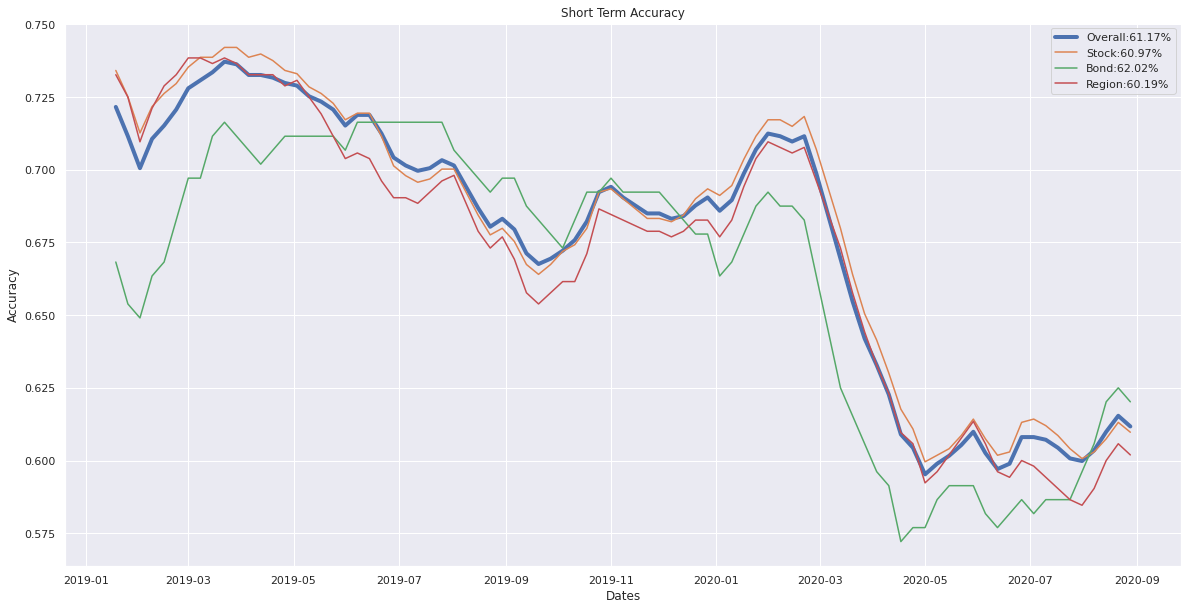

In [ ]:
sns.set(style="darkgrid")
fig, ax  = plt.subplots(figsize=(20,10))
sns.lineplot(x=Short_Accurate.index, y=Short_Accurate.Overall, linewidth = 4, \
             label = "Overall:{}%".format(round(Short_Accurate.Overall[0]*100,2)))
sns.lineplot(x=Short_Accurate.index, y=Short_Accurate.Stock,\
             label = "Stock:{}%".format(round(Short_Accurate.Stock[0]*100,2)))
sns.lineplot(x=Short_Accurate.index, y=Short_Accurate.Bond,\
             label = "Bond:{}%".format(round(Short_Accurate.Bond[0]*100,2)))
sns.lineplot(x=Short_Accurate.index, y=Short_Accurate.Region,\
             label = "Region:{}%".format(round(Short_Accurate.Region[0]*100,2)))
ax.set(xlabel='Dates', ylabel='Accuracy')
plt.title('Short Term Accuracy')
plt.legend()
plt.show()


# 長期準確率
> 長期準確率主要由區域型帶動

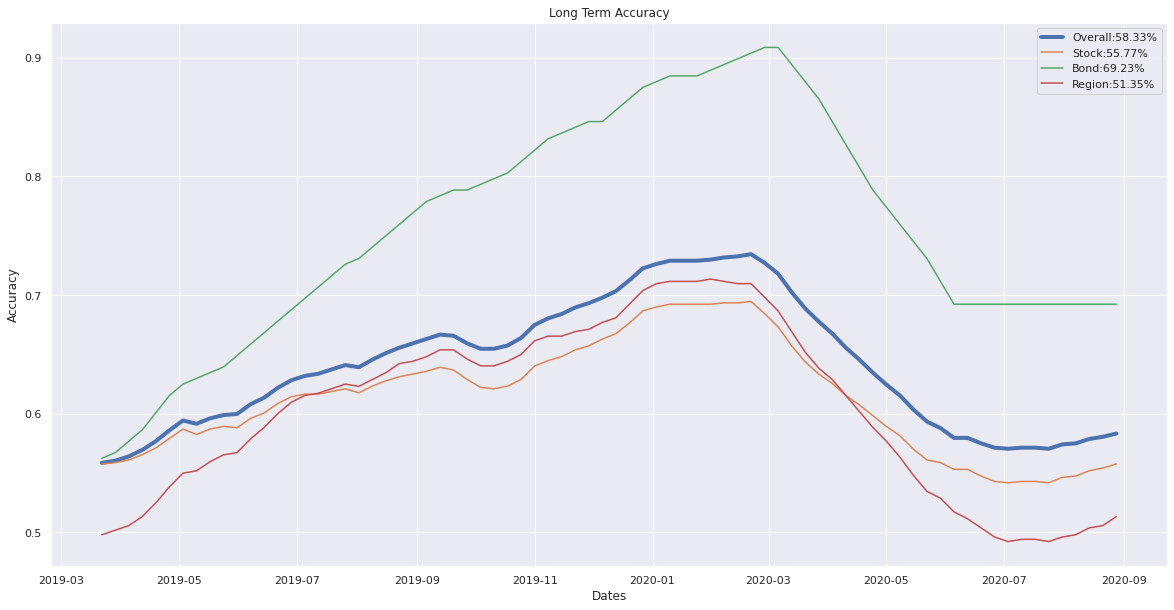

In [ ]:
sns.set(style="darkgrid")
fig, ax  = plt.subplots(figsize=(20,10))
sns.lineplot(x=Long_Accurate.index, y=Long_Accurate.Overall, linewidth = 4, \
             label = "Overall:{}%".format(round(Long_Accurate.Overall[0]*100,2)))
sns.lineplot(x=Long_Accurate.index, y=Long_Accurate.Stock,\
             label = "Stock:{}%".format(round(Long_Accurate.Stock[0]*100,2)))
sns.lineplot(x=Long_Accurate.index, y=Long_Accurate.Bond,\
             label = "Bond:{}%".format(round(Long_Accurate.Bond[0]*100,2)))
sns.lineplot(x=Long_Accurate.index, y=Long_Accurate.Region,\
             label = "Region:{}%".format(round(Long_Accurate.Region[0]*100,2)))
ax.set(xlabel='Dates', ylabel='Accuracy')
plt.title('Long Term Accuracy')
plt.legend()
plt.show()


# 更細部的市場

>由各市場圖來看，灰色區域為中性區間，下方的橘色區域為前一個月準確率位置（1代表短期樂觀, 0代表短期中性, -1代表短期保守)，可以發現到前一陣子股市不斷創高，使得許多放置在短期中性的市場失準，這也充分解釋為什麼7月以及近期的準確率會出現小幅拉回

No handles with labels found to put in legend.


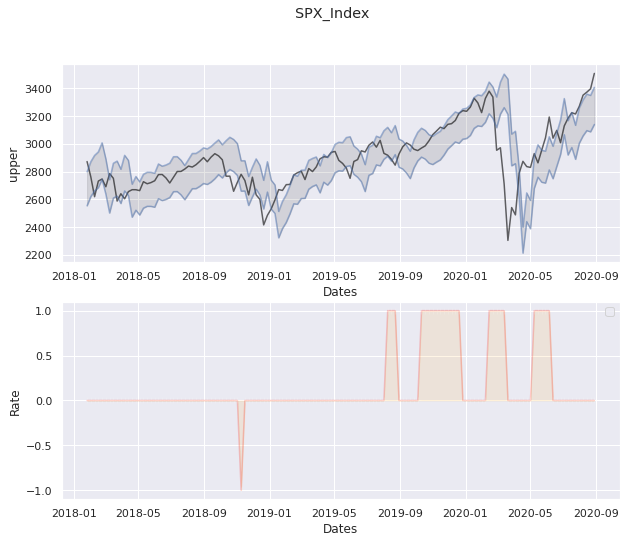

No handles with labels found to put in legend.


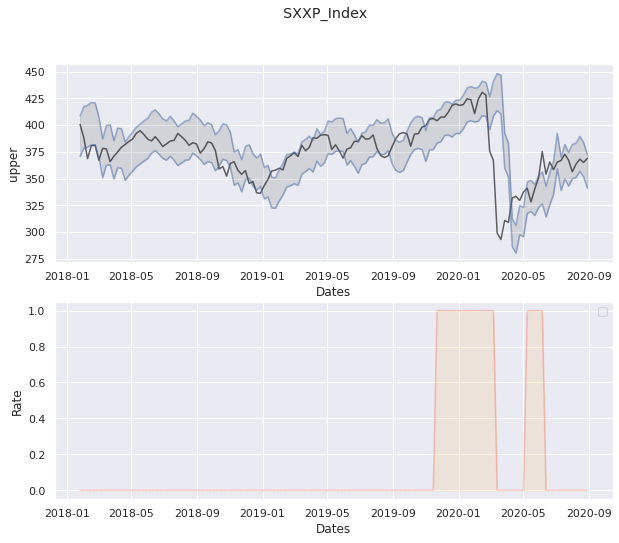

No handles with labels found to put in legend.


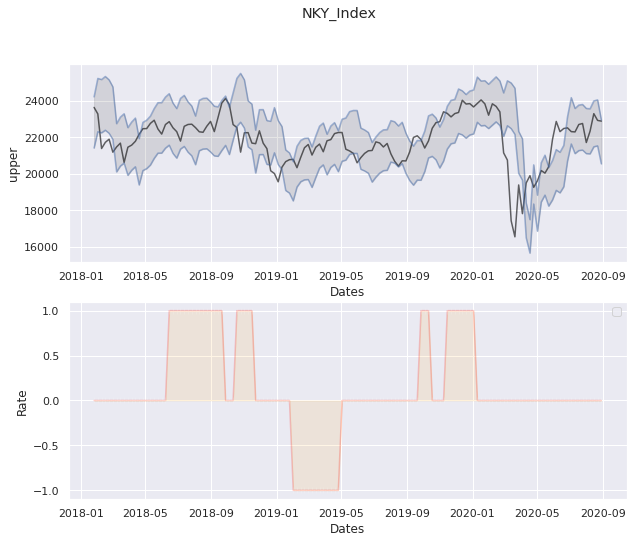

No handles with labels found to put in legend.


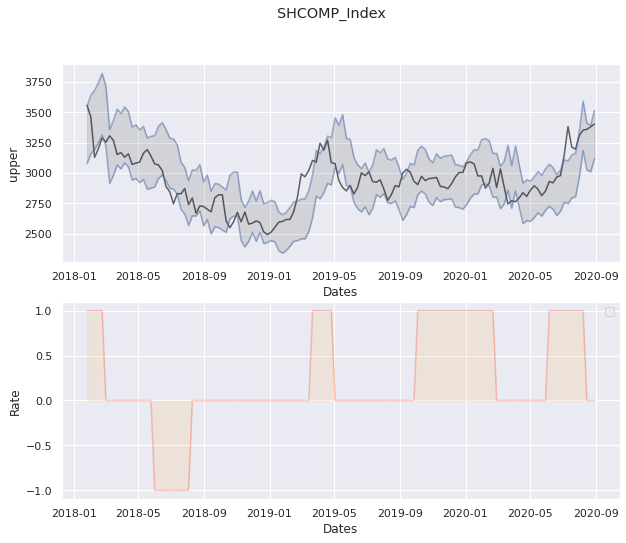

No handles with labels found to put in legend.


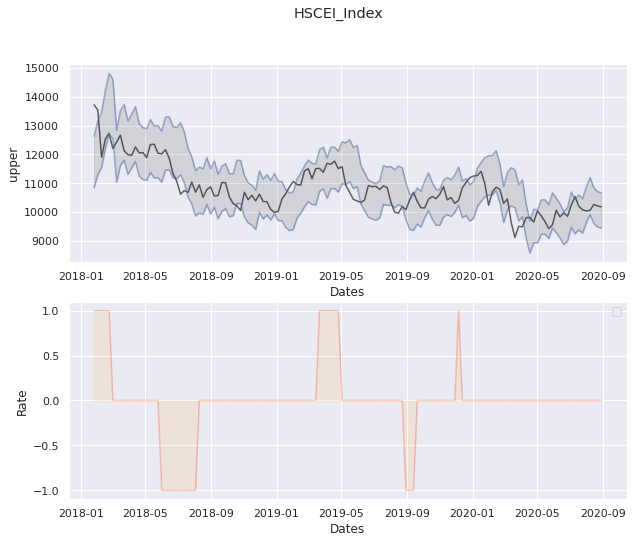

No handles with labels found to put in legend.


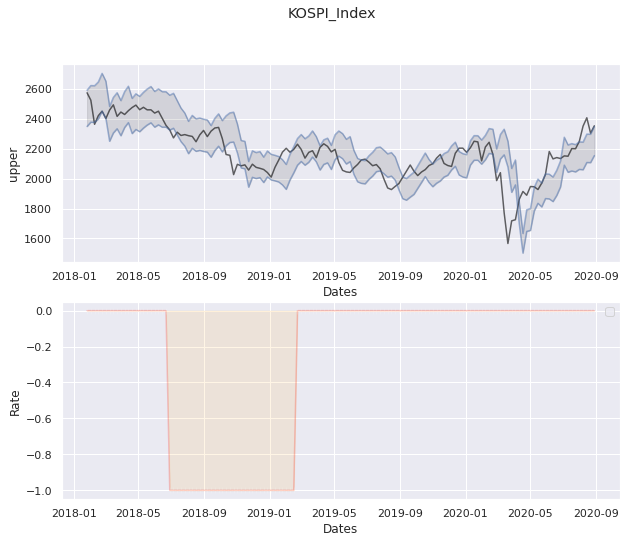

No handles with labels found to put in legend.


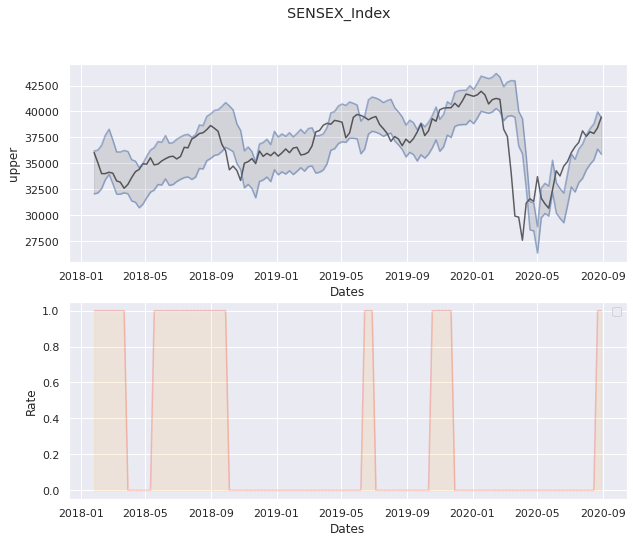

No handles with labels found to put in legend.


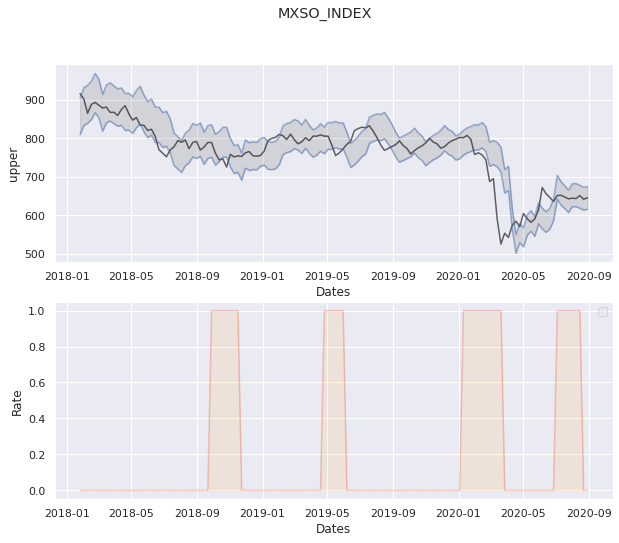

No handles with labels found to put in legend.


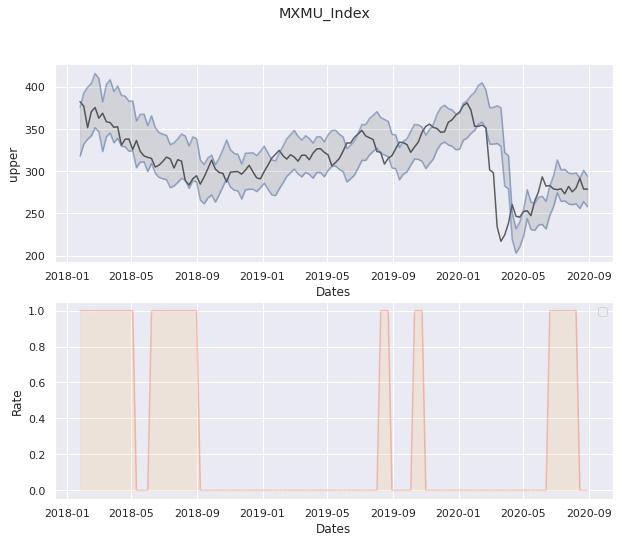

No handles with labels found to put in legend.


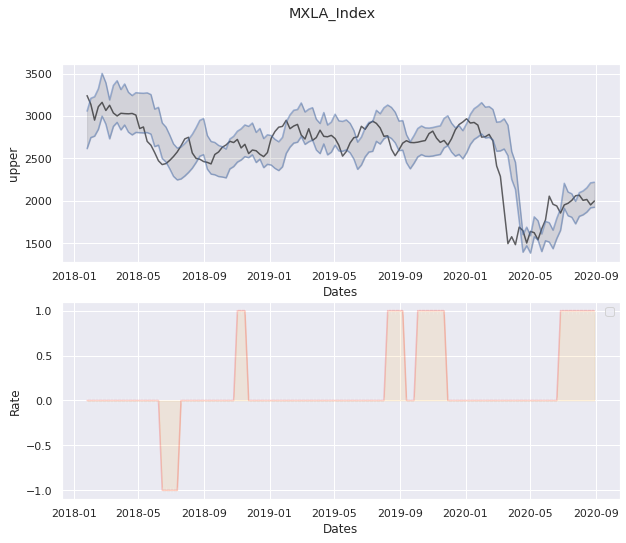

No handles with labels found to put in legend.


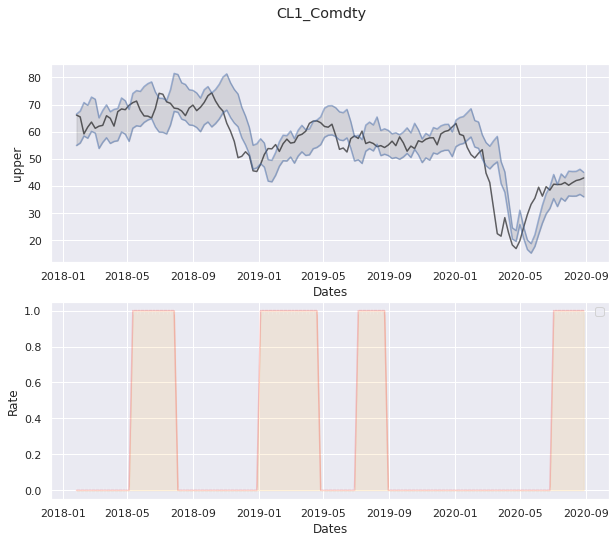

No handles with labels found to put in legend.


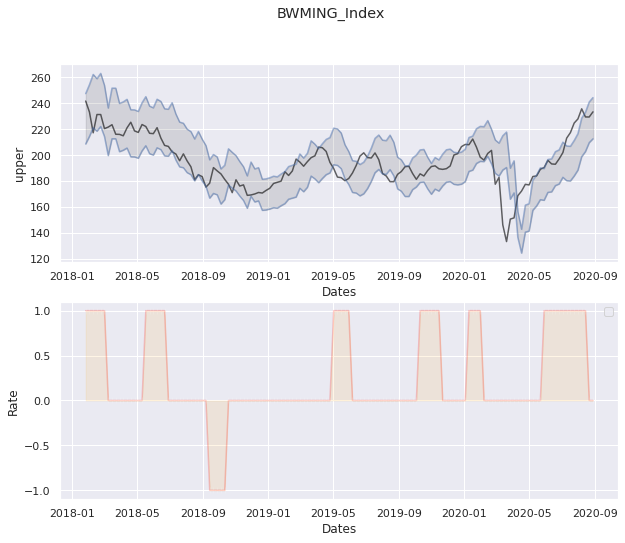

No handles with labels found to put in legend.


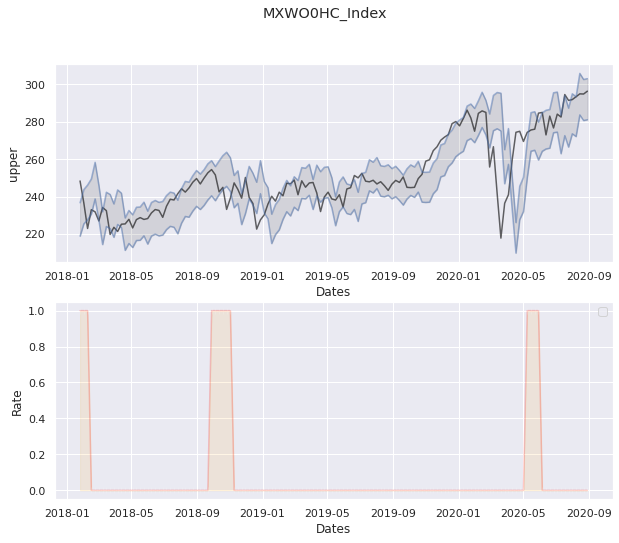

No handles with labels found to put in legend.


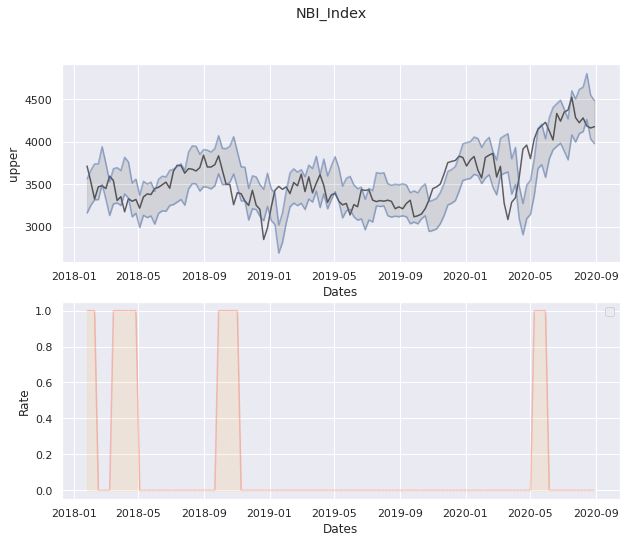

No handles with labels found to put in legend.


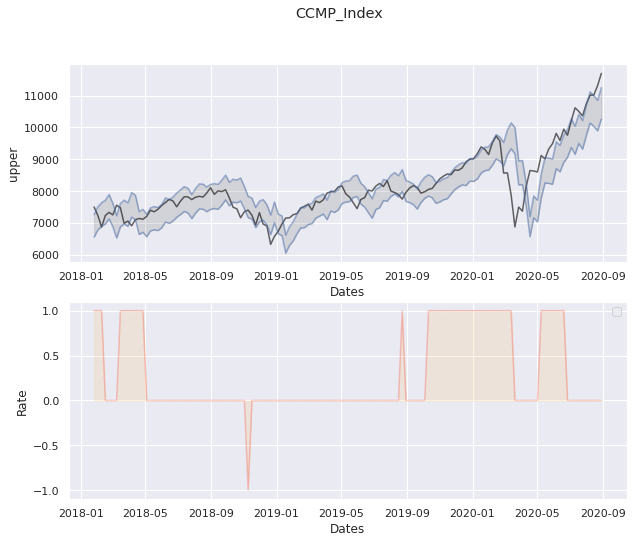

No handles with labels found to put in legend.


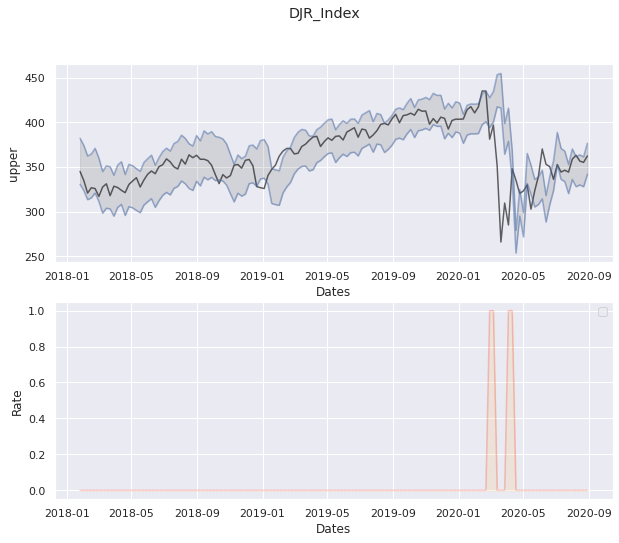

No handles with labels found to put in legend.


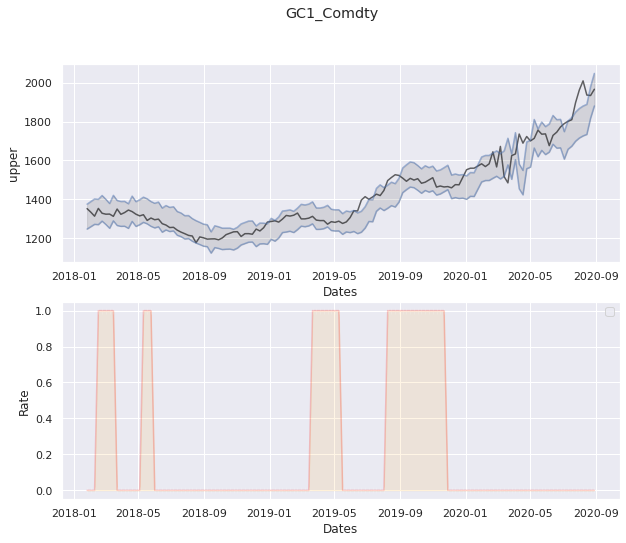

No handles with labels found to put in legend.


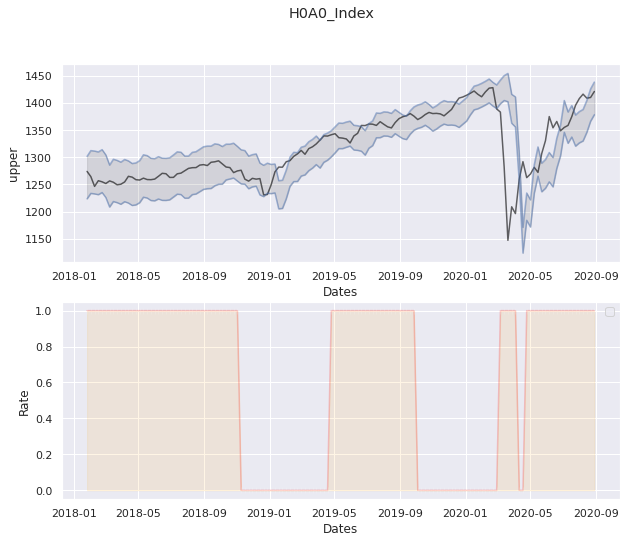

No handles with labels found to put in legend.


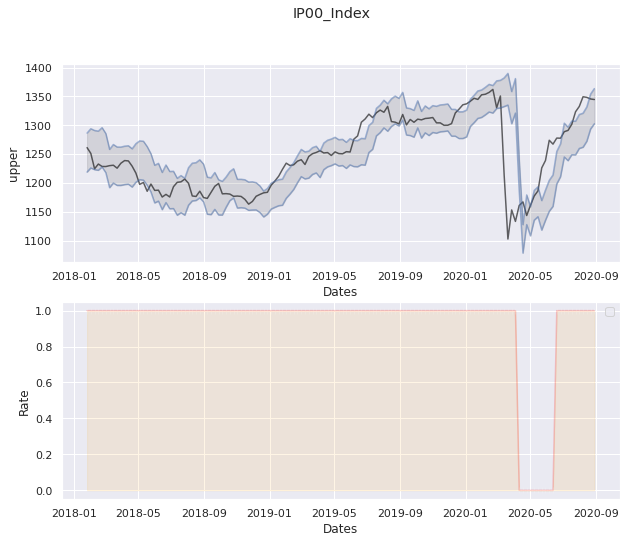

No handles with labels found to put in legend.


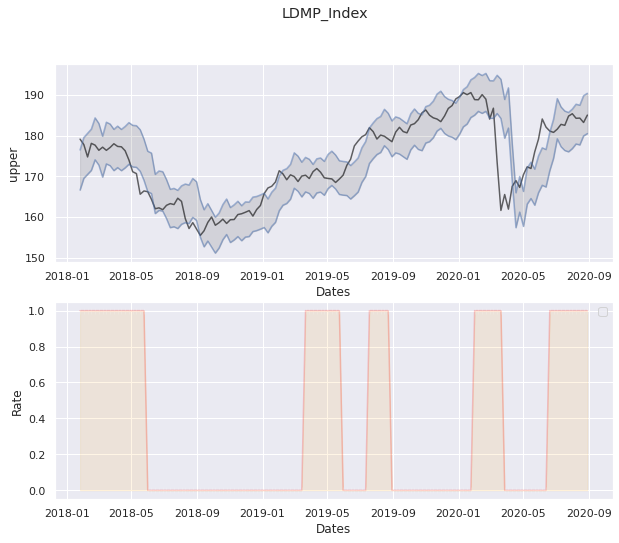

No handles with labels found to put in legend.


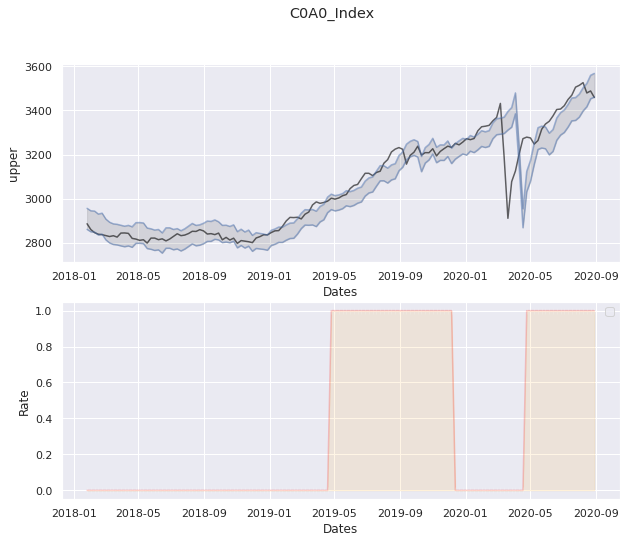

In [ ]:
plot_list = df_Price.columns
def trans(x):
  if x==1 or x==4 or x==7:
    return(1)
  elif x==2 or x==5 or x==8:
    return(0)
  else:
    return(-1)

for i in plot_list:
  temp_upper = df_Price[i].shift(-4)*(1+std_M[i])

  temp_lower = df_Price[i].shift(-4)/(1+std_M[i])
  temp = pd.DataFrame({"upper":temp_upper, "lower":temp_lower, "Index":df_Price[i],"Rate":df_Rating[i].apply(trans).shift(-4)})
  temp = temp.dropna()
  fig, ax  = plt.subplots(2,1,figsize=(10,8))
  sns.lineplot(x=temp.index, y=temp.Index, color = "black", alpha = 0.6, ax=ax[0])
  sns.lineplot(x=temp.index, y=temp.lower, color = "b", alpha = 0.5, ax=ax[0])
  sns.lineplot(x=temp.index, y=temp.upper, color = "b", alpha = 0.5, ax=ax[0])
  ax[0].fill_between(temp.index,temp.lower,temp.upper,where=temp.lower<=temp.upper, color="black", alpha=0.1)
  
  sns.lineplot(x=temp.index, y=temp.Rate,marker='+',color = 'red',alpha = 0.2, ax=ax[1])
  ax[1].fill_between(temp.index,temp.Rate, color = 'orange', alpha=0.1)
  plt.legend()
  fig.suptitle('{}'.format(i))
  plt.show()

# 短期準確率排行(52週平均)

> 準確率部分仍由國企指數拔得頭籌，而高收益債則是擠下礦業成為第二名

In [ ]:
Sort_Short = Short_Accurate[Short_Accurate.columns.drop(["Stock","Bond","Region"])].iloc[[0,4],:]
Sort_Short_Trans = Sort_Short.copy().T
Date_col = Sort_Short_Trans.columns
Sort_Short_Trans = Sort_Short_Trans.sort_values(by = Date_col[0], ascending = False)
Sort_Short_Trans["Change_%"] = Sort_Short_Trans[Date_col[0]] - Sort_Short_Trans[Date_col[1]]
Sort_Short_Trans


Dates,2020-08-28 00:00:00,2020-07-31 00:00:00,Change_%
HSCEI_Index,0.769231,0.730769,0.038462
H0A0_Index,0.769231,0.711538,0.057692
BWMING_Index,0.673077,0.615385,0.057692
SHCOMP_Index,0.673077,0.692308,-0.019231
DJR_Index,0.673077,0.692308,-0.019231
SXXP_Index,0.653846,0.596154,0.057692
SENSEX_Index,0.653846,0.653846,0.000000
NBI_Index,0.653846,0.673077,-0.019231
CCMP_Index,0.634615,0.673077,-0.038462
NKY_Index,0.615385,0.615385,0.000000


# 長期準確率排行(52週平均)

> 長期則由黃金以及債券類位居高位

In [ ]:
Sort_Long = Long_Accurate[Long_Accurate.columns.drop(["Stock","Bond","Region"])].iloc[[0,4],:]
Sort_Long_Trans = Sort_Long.copy().T
Date_col = Sort_Long_Trans.columns
Sort_Long_Trans = Sort_Long_Trans.sort_values(by = Date_col[0], ascending = False)
Sort_Long_Trans["Change_%"] = Sort_Long_Trans[Date_col[0]] - Sort_Long_Trans[Date_col[1]]
Sort_Long_Trans


Dates,2020-08-28 00:00:00,2020-07-31 00:00:00,Change_%
GC1_Comdty,0.865385,0.865385,0.000000
C0A0_Index,0.750000,0.750000,0.000000
LDMP_Index,0.750000,0.750000,0.000000
H0A0_Index,0.730769,0.730769,0.000000
SPX_Index,0.692308,0.692308,0.000000
CCMP_Index,0.653846,0.653846,0.000000
SHCOMP_Index,0.615385,0.557692,0.057692
BWMING_Index,0.596154,0.557692,0.038462
HSCEI_Index,0.596154,0.519231,0.076923
Overall,0.583333,0.574176,0.009158


# 近一個月準確率變動
> 最後看一下近一個月的準確率變動排行
由高收債, 礦業, 歐股, 本地債, 新歐, 能源領漲

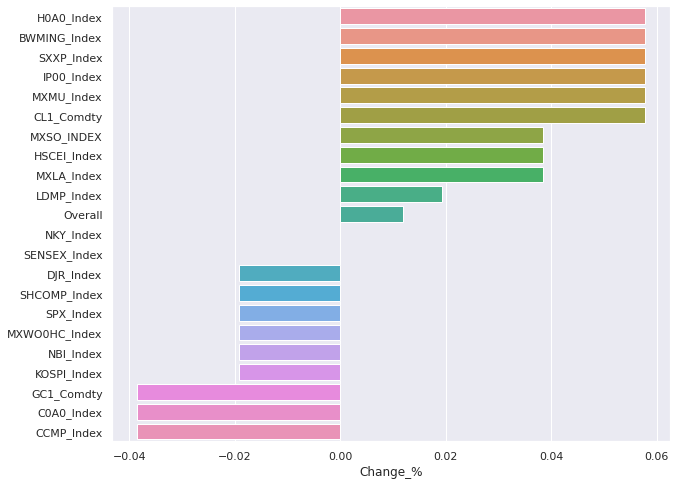

In [ ]:
test = Sort_Short_Trans["Change_%"].sort_values(ascending = False)
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(test,test.index)

# 最後這部分供研究員參考

2019年以來各市場準確率的合鬚圖

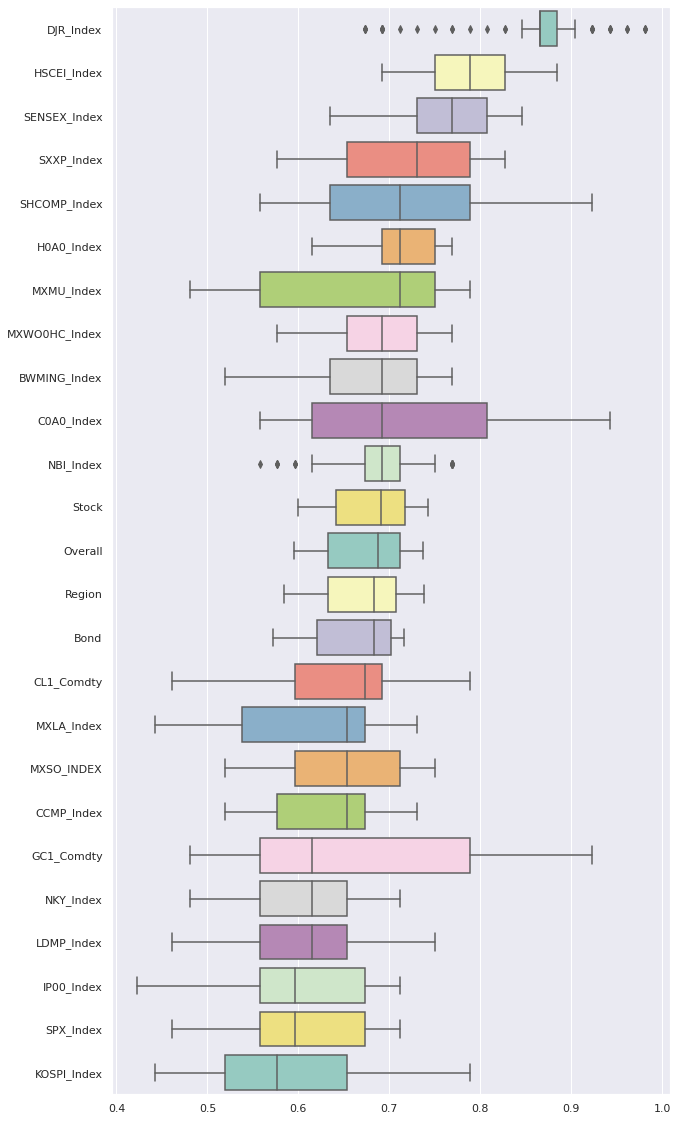

In [ ]:
order = Short_Accurate.median().sort_values(ascending = False).index
fig, ax  = plt.subplots(figsize=(10,20))
sns.boxplot(data = Short_Accurate,palette="Set3", order = order, orient = 'h')
plt.show()